In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

In [3]:
df= pd.read_csv(r'C:\Users\KIIT\Desktop\5th Semester\AP Lab\HousingData.csv')

In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

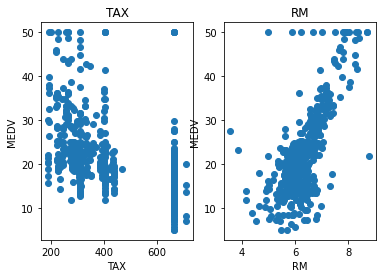

In [6]:
features=['TAX', 'RM']
target=df['MEDV']
for i,col in enumerate(features):
    plt.subplot(1,len(features),i+1)
    x=df[col]
    y=target
    plt.scatter(x,y,marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [7]:
X=pd.DataFrame(np.c_[df['TAX'],df['RM']],columns=['TAX','RM'])
Y=df['MEDV']

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 2)
(152, 2)
(354,)
(152,)


In [9]:
lin_model=LinearRegression()
lin_model.fit(X_train,Y_train)

LinearRegression()

In [10]:
from sklearn.preprocessing import PolynomialFeatures
def poly(degree):
    poly_feat=PolynomialFeatures(degree=degree)
    X_train_poly=poly_feat.fit_transform(X_train)
    poly_model=LinearRegression()
    poly_model.fit(X_train_poly,Y_train)
    y_train_pred=poly_model.predict(X_train_poly)
    y_test_pred=poly_model.predict(poly_feat.fit_transform(X_test))
    
    rmse_train=np.sqrt(mean_squared_error(Y_train,y_train_pred))    
    r2_train=r2_score(Y_train,y_train_pred)
 
    rmse_test=np.sqrt(mean_squared_error(Y_test,y_test_pred))
    r2_test=r2_score(Y_test,y_test_pred)
    print("MODEL PERFORMANCE FOR TRAINING SET:")
    print("RMSE OF training set: ",rmse_train)
    print("R2 score of training set : ",r2_train)
    print("MODEL PERFORMANCE FOR TEST SET:")
    print("RMSE OF testing set: ",rmse_test)
    print("R2 score of testing set : ",r2_test)
    

In [11]:
poly(4)

MODEL PERFORMANCE FOR TRAINING SET:
RMSE OF training set:  5.2187362635285055
R2 score of training set :  0.6742767666567246
MODEL PERFORMANCE FOR TEST SET:
RMSE OF testing set:  4.933602444554011
R2 score of testing set :  0.7163365226794222


In [12]:
poly(6)

MODEL PERFORMANCE FOR TRAINING SET:
RMSE OF training set:  5.118805459477653
R2 score of training set :  0.6866315375148642
MODEL PERFORMANCE FOR TEST SET:
RMSE OF testing set:  4.991047329199311
R2 score of testing set :  0.7096923383435099


In [13]:
poly(7)

MODEL PERFORMANCE FOR TRAINING SET:
RMSE OF training set:  5.119413181638795
R2 score of training set :  0.6865571247380298
MODEL PERFORMANCE FOR TEST SET:
RMSE OF testing set:  4.943280491324369
R2 score of testing set :  0.7152225289552763
